****************************************************************************
* @file: Speeds.py
* @project: ROBOFEI-HT - FEI 😛
* @author: Vinicius Nicassio Ferreira
* @version: V0.0.1
* @created: 23/10/2017
* @e-mail: vinicius.nicassio@gmail.com
* @brief: Class Speeds
****************************************************************************

In [1]:
#ini-iPython

# Executando no diretório principal

In [2]:
import os
os.chdir('../../') #Executando na pasta Visual_Memory
import sys
sys.path.append('./include')
sys.path.append('./src')
sys.path.append('./Workbench/iPython')
#end-iPython

---- Imports ----

In [3]:
# Libraries to be used.
import sys
#des-iPython sys.path.append("../include")
#des-iPython sys.path.append("../src")

In [4]:
# The standard libraries used in the visual memory system.


In [5]:
# Used class developed by RoboFEI-HT.
from Basic import * # Class with implementations and basic variables
sym.init_printing() #debug-iPython

# Class to Speeds
Class responsible for managing the robot's possible speeds (me).
doxygen-iPython

In [6]:
#des-iPython class Speeds(Basic):
#ini-tab -> Iniciando código classe

---- Variables ----

# __movementslist
Velocity list of robot movements.
doxygen-iPython

In [7]:
__movementslist = [] #self-iPython __movementslist

# __u
Speed matrix $u_t$.
doxygen-iPython

In [8]:
__u = None #self-iPython __u

# __R
Speed error matrix $R_t$.
doxygen-iPython

In [9]:
__R = None #self-iPython __R

In [10]:
#ini-iPython

# ------- Lista de funções herdadas -------



# ------- Lista variaveis herdadas -------

#self-iPython vrx
#self-iPython vry
#self-iPython arx
#self-iPython ary

# ------- Lista de funções -------

#self-iPython update
#self-iPython __getitem__

#end-iPython - Fim listas

# Constructor Class
Initializes basic network parameters and creates standard speeds.
doxygen-iPython

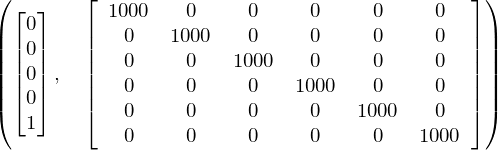

In [11]:
#des-iPython def __init__(self):
#ini-tab -> Criando construtor
__movementslist.append({
    "x_speed": sym.Matrix([
        [0], # v_x
        [0], # v_y
        [0], # a_x
        [0], # a_y
        [1], # constant
    ]),
        
    "R": sym.Matrix(sym.Identity(6)*0)
})

__t = sym.symbols("t") # Declaring variable time

# Robot speed and acceleration variables
vrx, vry = sym.symbols("vr_x vr_y")
arx, ary = sym.symbols("ar_x ar_y")


# Kalman filter matrices
__u = sym.Matrix([
    [0],
    [0],
    [0],
    [0],
    [1],
])

__R = sym.Matrix(sym.Identity(6)*1000)

__u, __R #debug-iPython

In [12]:
#end-tab -> Finalizando construtor
#ini-iPython

## Teste construtor

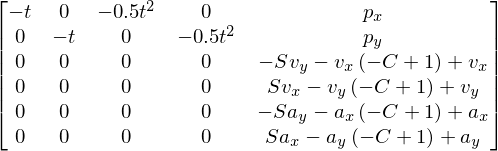

In [13]:
p_x, p_y, v_x, v_y, a_x, a_y = sym.symbols("p_x, p_y, v_x, v_y, a_x, a_y") # Object state variables

sym.Matrix([
    [vrx],
    [vry],
    [arx],
    [ary],
    [1],
])

px, py, p = sym.symbols("px py p")
px = 0.5*arx*__t**2# + vrx*__t
py = 0.5*ary*__t**2# + vry*__t

C, S = sym.symbols("C S")
# C = sym.cos(sym.atan2(py, px))
# S = sym.sin(sym.atan2(py, px))

Z = sym.Matrix([
    [p_x - __t*vrx - 0.5*arx*__t**2],
    [p_y - __t*vry - 0.5*ary*__t**2],
    [v_x - v_x*(1-C) - v_y*S],
    [v_y - v_y*(1-C) + v_x*S],
    [a_x - a_x*(1-C) - a_y*S],
    [a_y - a_y*(1-C) + a_x*S],
])

sym.Matrix([
    [p_x - __t*vrx - 0.5*arx*__t**2],
    [p_y - __t*vry - 0.5*ary*__t**2],
    [v_x - v_x*(1-C) - v_y*S],
    [v_y - v_y*(1-C) + v_x*S],
    [a_x - a_x*(1-C) - a_y*S],
    [a_y - a_y*(1-C) + a_x*S],
])

B = sym.Matrix([
    [-__t, 0, -0.5*__t**2, 0, p_x],
    [0, -__t, 0, -0.5*__t**2, p_y],
    [0, 0, 0, 0, v_x - v_x*(1-C) - v_y*S],
    [0, 0, 0, 0, v_y - v_y*(1-C) + v_x*S],
    [0, 0, 0, 0, a_x - a_x*(1-C) - a_y*S],
    [0, 0, 0, 0, a_y - a_y*(1-C) + a_x*S],
])

U = sym.Matrix([
    [vrx],
    [vry],
    [arx],
    [ary],
    [1],
])

B
#end-iPython

# update
Adds average robot speeds or upgrades to speeds.
@param vector Observed speed.
doxygen-iPython

In [14]:
#eself-iPython update
#edes-iPython def update(self, vector):
def update(vector):
    if vector[0] == 0:
        return
    
    if vector[0] + 1 > len(__movementslist):
        while vector[0] + 1 > len(__movementslist):
            __movementslist.append({
                "x_speed": sym.Matrix([
                    [0], # v_x
                    [0], # v_y
                    [0], # a_x
                    [0], # a_y
                    [1], # constant
                ]),

                "R": copy(__R)
            })
    
    __movementslist[vector[0]]["x_speed"] = -sym.Matrix(vector[1][2:]).row_insert(4, sym.Matrix([-1]))
    __movementslist[vector[0]]["R"] = vector[2] #self-iPython update

In [15]:
#ini-iPython

## Teste update

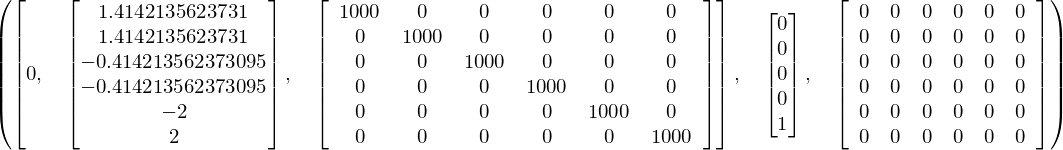

In [16]:
mov = 0

vector = [
    mov, # Movimento 
    
    sym.Matrix([ # Velocidades calculadas
        [2**0.5],
        [2**0.5],
        [1-2**0.5],
        [1-2**0.5],
        [-2],
        [2],
    ]),
    
    
    copy(__R), # Erros calculados
]



update(vector)

vector, __movementslist[mov]["x_speed"], __movementslist[mov]["R"]
#end-iPython

# __getitem__
Returns the dictionary of motion vectors.
@param x Vector position to be accessed.
@return Returns the dictionary that will be used.
doxygen-iPython

In [17]:
#eself-iPython __getitem__
#edes-iPython def __getitem__(self, x):
def __getitem__(x):
    if x + 1 > len(__movementslist):
        while x + 1 > len(__movementslist):
            __movementslist.append({
                "x_speed": sym.Matrix([
                    [0], # v_x
                    [0], # v_y
                    [0], # a_x
                    [0], # a_y
                    [1], # constant
                ]),

                "R": copy(__R)
            })
    return __movementslist[x] #self-iPython __getitem__

In [18]:
#ini-iPython

## Teste __getitem__

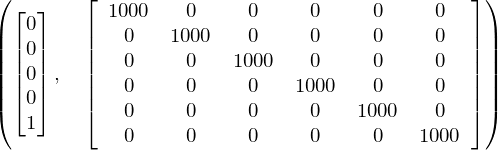

In [19]:
a = 10
__getitem__(a)["x_speed"], __getitem__(a)["R"]
#end-iPython

In [20]:
#end-tab -> Finalizando classe

In [21]:
#ini-iPython

# nova_variavel
.
doxygen-iPython

In [22]:
nova_variavel = None #self-iPython nova_variavel

# nova_funcao
.
doxygen-iPython

In [23]:
# eself-iPython nova_funcao
# edes-iPython def nova_funcao(self, variaveis_funcao):
def nova_funcao(variaveis_funcao):
    pass # self-iPython nova_funcao

In [24]:
#ini-iPython

## Teste nova_funcao

In [25]:

#end-iPython

In [26]:
#end-iPython